<a href="https://colab.research.google.com/github/vikasvr1997/ML_train/blob/main/02_K_Nearest_Neighbors_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import necessary algorithms

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [194]:
knn_data = pd.read_csv('/content/sample_data/KNN_Project_Data')

**Check the head of the dataframe.**

In [195]:
knn_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

In [196]:
#sns.pairplot(knn_data, hue = 'TARGET CLASS',diag_kind='hist', palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [197]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

** Create a StandardScaler() object called scaler.**

In [198]:
scalar = StandardScaler()

** Fit scaler to the features.**

In [199]:
scalar.fit(knn_data.drop('TARGET CLASS',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [200]:
scaled_features = scalar.fit_transform(knn_data.drop('TARGET CLASS',axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [201]:
knn_data_2 = pd.DataFrame(scaled_features, columns = knn_data.columns[:-1])
knn_data_2

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X = knn_data_2
y = knn_data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

**Create a KNN model instance with n_neighbors=1**

In [204]:
model = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [205]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [206]:
pred = model.predict(X_test)

** Create a confusion matrix and classification report.**

In [207]:
from sklearn.metrics import classification_report, confusion_matrix

In [208]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



### Elbow method to find optimal K Value

# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [209]:
err_rate = []

for i in range(1,60):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  err_rate.append(np.mean(pred_i != y_test))

**Now create the following plot using the information from your for loop.**

Text(0.5, 1.0, 'Error rate vs K Value')

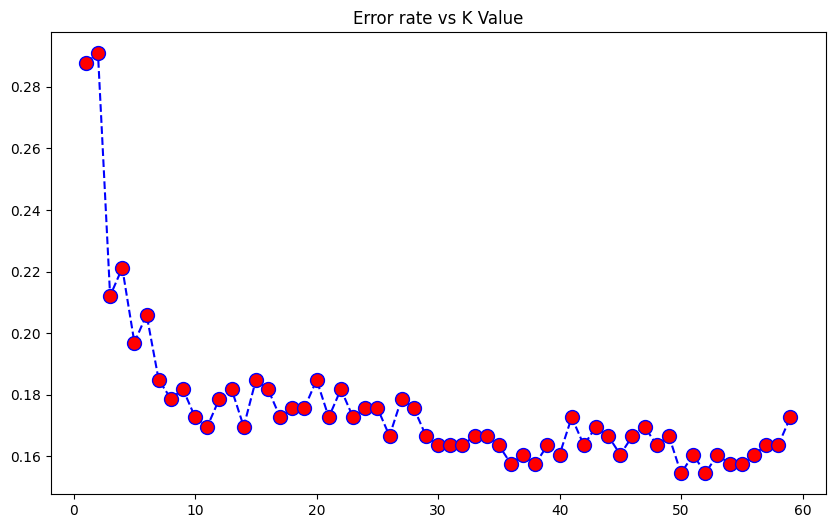

In [210]:
plt.figure(figsize= (10,6))
plt.plot(range(1,60),err_rate, color = 'blue', linestyle = '--', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Error rate vs K Value')


Lets find the minimum value of error rate to find optimal k value using min function

In [211]:
min_error = min(err_rate)
min_error_index = err_rate.index(min_error)
optimal_k = min_error_index+1
print(optimal_k)

50


## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [212]:
def k_model(X_train,y_train,X_test = None, y_test = None, neignbour_value = 1 ):
  model = KNeighborsClassifier(n_neighbors= neignbour_value)
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  print(classification_report(y_test, pred))
  print(confusion_matrix(y_test, pred))

k_model(X_train, y_train,X_test,y_test,50)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       162
           1       0.86      0.83      0.85       168

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330

[[139  23]
 [ 28 140]]


# Great Job!

Use Logistic Regression

In [217]:
def model(X_train,y_train,X_test = None, y_test = None, select_model = KNeighborsClassifier(n_neighbors = optimal_k )) :
  model = select_model
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  print(classification_report(y_test, pred))
  print(confusion_matrix(y_test, pred))

model(X_train, y_train, X_test, y_test, LogisticRegression())

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       162
           1       0.85      0.82      0.83       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[137  25]
 [ 30 138]]


Using Naive Bayes

In [218]:
model(X_train, y_train, X_test, y_test, GaussianNB())

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       162
           1       0.82      0.83      0.82       168

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82      0.82      0.82       330

[[131  31]
 [ 29 139]]


Use SVM

In [219]:
model(X_train, y_train, X_test, y_test, SVC())

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       162
           1       0.83      0.84      0.83       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[133  29]
 [ 27 141]]


# Additional
We can also use some python inbuilt function to find the important variables for our model as shown in below example code

In [214]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.model_selection import train_test_split
# import pandas as pd

# def k_model(X_train, y_train, X_test, y_test, neighbor_value=1, k_features=5):
#     # Feature selection using SelectKBest
#     selector = SelectKBest(score_func=f_classif, k=k_features)
#     X_train_selected = selector.fit_transform(X_train, y_train)
#     X_test_selected = selector.transform(X_test)
#     selected_features = X_train.columns[selector.get_support()]

#     # Train KNN model
#     model = KNeighborsClassifier(n_neighbors=neighbor_value)
#     model.fit(X_train_selected, y_train)

#     # Make predictions
#     pred = model.predict(X_test_selected)

#     # Evaluate the model
#     print("Selected Features:", selected_features)
#     print(classification_report(y_test, pred))
#     print(confusion_matrix(y_test, pred))

# # Assuming you have your data loaded and split into X_train, X_test, y_train, y_test
# # Replace this with your actual dataset loading and train-test split
# k_model(X_train, y_train, X_test, y_test, neighbor_value=50, k_features=10)


Alternate code for finding best classifiers is given below

In [220]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

def model(X_train, y_train, X_test=None, y_test=None, select_model=None):
    if X_test is None or y_test is None:
        raise ValueError("Test data (X_test and y_test) cannot be None.")

    if select_model is None:
        raise ValueError("A model must be provided.")

    model = select_model
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print(classification_report(y_test, pred))
    print(confusion_matrix(y_test, pred))

    return accuracy_score(y_test, pred)

# Assuming you have X_train, X_test, y_train, and y_test already defined

# Test different classifiers and select the best
classifiers = {
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=optimal_k),
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC()
}

accuracies = {}
for clf_name, clf in classifiers.items():
    accuracies[clf_name] = model(X_train, y_train, X_test, y_test, select_model=clf)

best_classifier = max(accuracies, key=accuracies.get)
print(f"The best classifier is: {best_classifier} with accuracy: {accuracies[best_classifier]}")


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       162
           1       0.86      0.83      0.85       168

    accuracy                           0.85       330
   macro avg       0.85      0.85      0.85       330
weighted avg       0.85      0.85      0.85       330

[[139  23]
 [ 28 140]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       162
           1       0.85      0.82      0.83       168

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330

[[137  25]
 [ 30 138]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       162
           1       0.82      0.83      0.82       168

    accuracy                           0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.82     